# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key 

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
# OpenWeatherMap API Key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0e0bfc2b5d4b0209aeb33daf48edf7fb'

In [4]:
# Created empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f".............................")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
                
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue
    
# Log file print statement
print(f".............................")
print(f"Data Retrieval Complete")
print(f".............................")

Beginning Data Retrieval
.............................
Processing Record 1 | Punta Arenas
Processing Record 2 | Dikson
City not found. Skipping...
Processing Record 3 | Mahebourg
Processing Record 4 | Kloulklubed
Processing Record 5 | Rikitea
Processing Record 6 | Hilo
Processing Record 7 | Mandalgovi
City not found. Skipping...
Processing Record 8 | Lebu
Processing Record 9 | Nador
Processing Record 10 | Qaanaaq
Processing Record 11 | Barrow
City not found. Skipping...
Processing Record 12 | Bethel
Processing Record 13 | Namibe
Processing Record 14 | Kapaa
Processing Record 15 | Petropavlovsk-Kamchatskiy
Processing Record 16 | Ancud
Processing Record 17 | Wakkanai
Processing Record 18 | Tuktoyaktuk
Processing Record 19 | Mataura
Processing Record 20 | San Ignacio
Processing Record 21 | Cape Town
City not found. Skipping...
Processing Record 22 | Busselton
Processing Record 23 | Baoro
Processing Record 24 | Airai
Processing Record 25 | Khatanga
Processing Record 26 | Bluff
Processing R

Processing Record 225 | Grindavik
Processing Record 226 | Beringovskiy
Processing Record 227 | Brae
Processing Record 228 | Atasu
Processing Record 229 | Saldanha
Processing Record 230 | Haftoni
Processing Record 231 | Arraial do Cabo
Processing Record 232 | Visby
Processing Record 233 | Amazar
Processing Record 234 | Tibiri
Processing Record 235 | Pinyug
Processing Record 236 | Waipawa
Processing Record 237 | Miandrivazo
Processing Record 238 | Clarksburg
Processing Record 239 | Singaraja
Processing Record 240 | Greytown
Processing Record 241 | North Bend
Processing Record 242 | Hamilton
City not found. Skipping...
Processing Record 243 | Kaitangata
Processing Record 244 | Prince Albert
Processing Record 245 | Verkhoyansk
Processing Record 246 | Kamenka
Processing Record 247 | Almaty
City not found. Skipping...
Processing Record 248 | Sao Joao da Barra
Processing Record 249 | Vagur
Processing Record 250 | Kikuyu
Processing Record 251 | Laguna
Processing Record 252 | Lata
Processing Re

Processing Record 455 | Northam
City not found. Skipping...
Processing Record 456 | Grand Forks
Processing Record 457 | Chibombo
Processing Record 458 | Sioux Lookout
Processing Record 459 | Fort Wellington
Processing Record 460 | Silver City
Processing Record 461 | Chantada
Processing Record 462 | Tirumullaivasal
Processing Record 463 | Piopio
Processing Record 464 | Pasighat
Processing Record 465 | Zabaykalsk
Processing Record 466 | Malayal
Processing Record 467 | Tutoia
Processing Record 468 | Trindade
City not found. Skipping...
Processing Record 469 | Makakilo City
Processing Record 470 | Port Lincoln
Processing Record 471 | Nanortalik
Processing Record 472 | Lavrentiya
Processing Record 473 | Husavik
Processing Record 474 | Rosetown
Processing Record 475 | Dhidhdhoo
Processing Record 476 | Caarapo
Processing Record 477 | Licheng
Processing Record 478 | Monrovia
Processing Record 479 | Lagos
Processing Record 480 | Pardina
Processing Record 481 | Vila Franca do Campo
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          558
Cloudiness    558
Country       558
Date          558
Humidity      558
Lat           558
Lng           558
Max Temp      558
Wind Speed    558
dtype: int64

In [13]:
# Save data frame to CSV
weather_data.to_csv('Output_CSV/weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Punta Arenas,40,CL,1561675350,74,-53.16,-70.91,28.40,13.87
1,Dikson,84,RU,1561675351,96,73.51,80.55,33.80,4.74
2,Mahebourg,20,MU,1561675353,78,-20.41,57.70,73.40,11.41
3,Kloulklubed,75,PW,1561675354,78,7.04,134.26,82.40,11.41
4,Rikitea,100,PF,1561675355,82,-23.12,-134.97,75.33,17.16


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

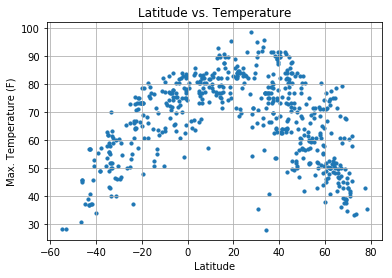

In [15]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Other graph properties
plt.title("Latitude vs. Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

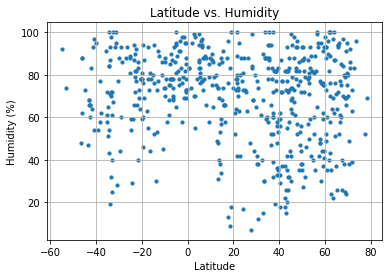

In [16]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Other graph properties
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

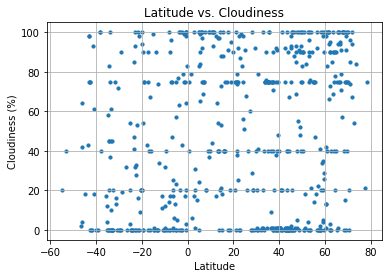

In [17]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Other graph properties
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

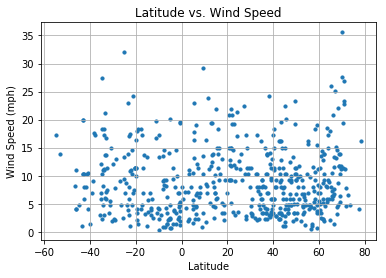

In [18]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Other graph properties
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()
